In [12]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn import metrics

# loading dataset
df = pd.read_csv('Customers.csv')

# checking for null values
null_val = pd.DataFrame(df.isnull().sum().sort_values(ascending=False)[:25])
null_val.columns = ['Null Count']
null_val.index.name = 'Feature'
print(null_val, '\n')


                        Null Count
Feature                           
Spending Score (1-100)           0
Annual Income (k$)               0
Age                              0
Gender                           0
CustomerID                       0 



In [13]:
# Getting required data 
data = df[['Annual Income (k$)', 'Spending Score (1-100)']].iloc[:, :]
print(data.head(5), '\n')

   Annual Income (k$)  Spending Score (1-100)
0                  15                      39
1                  15                      81
2                  16                       6
3                  16                      77
4                  17                      40 



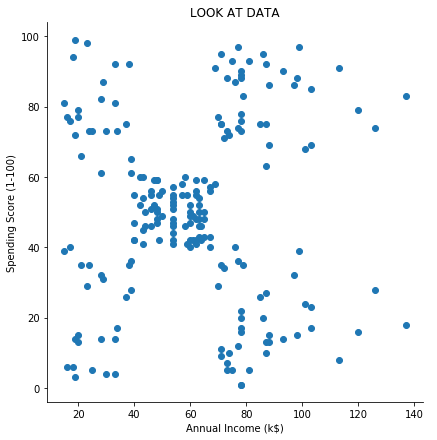

In [14]:
# Ploting graph for the data 
sns.FacetGrid(data, height=6).map(plt.scatter, 'Annual Income (k$)', 'Spending Score (1-100)').add_legend()
plt.show()

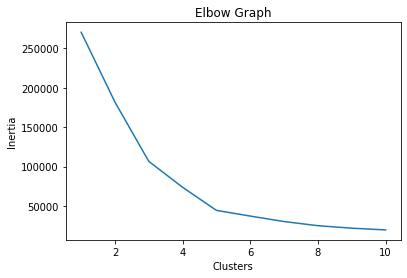

In [21]:
# determinimg k with elbow graph
wc = []
for i in range(1, 11):
    k = KMeans(n_clusters=i, max_iter=300, random_state=0)
    k.fit(data)
    wc.append(k.inertia_)
plt.plot(range(1, 11), wc)
plt.xlabel('Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Graph')
plt.show()

In [16]:
# 5 clusters
num_clusters = 5
seed = 0

# training and fitting the data
km = KMeans(n_clusters=num_clusters)
km.fit(data)

# Calculating Silhouette score
y_cluster_km = km.predict(data)
score = metrics.silhouette_score(data, y_cluster_km)
print('Silhouette score is: ', score)

Silhouette score is:  0.553931997444648


C:\Users\bharg\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


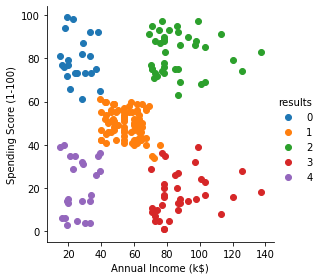

In [22]:
# Visu
data['results'] = y_cluster_km
sns.FacetGrid(data, hue="results", height=4).map(plt.scatter, 'Annual Income (k$)', 'Spending Score (1-100)').add_legend()
plt.show()